In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import json
import gc
import os

In [47]:
gc.collect()

835

In [26]:
with open("../data/samples/read_ids.json", "r") as f:
    read_ids = json.load(f)
    
read_ids = [[{"sample_id": sample_id, "read_id": read_id} for read_id in read_ids[sample_id]] for sample_id in read_ids]

read_ids_df = pd.DataFrame(read_ids[0] + read_ids[1] + read_ids[2])
read_ids_df

,sample_id,read_id
0,GS003,JCVI_READ_1091145030183
1,GS003,JCVI_READ_1095403403926
2,GS003,JCVI_READ_1095403478765
3,GS003,JCVI_READ_1095403421433
4,GS003,JCVI_READ_1095403403927
...,...,...
29995,GS037,JCVI_READ_1095964463383
29996,GS037,JCVI_READ_1095964465303
29997,GS037,JCVI_READ_1095964452922
29998,GS037,JCVI_READ_1095964451194


# MASH

In [39]:
def calculate_mash_mindist(path):
    reg = {}

    with open(path, "r") as f:

        count = 0
        for line in f:
            rec = line.split("\t")
            distance = float(rec[2])

            if reg.get(rec[0]) == None:
                reg[rec[0]] = 1
            elif reg.get(rec[0]) > distance:
                reg[rec[0]] = distance

            if reg.get(rec[1]) == None:
                reg[rec[1]] = 1
            elif reg.get(rec[1]) > distance:
                reg[rec[1]] = distance


            count += 1
            if count % int(10e6) == 0:
                print(count)
                
    return pd.DataFrame([{
        'read_id': x,
        'mindist': reg[x]
    } for x in reg])

### GS003_GS005

In [53]:
aux_mindist_path = "../distances/mash-k10-s100/GS003_GS005.mindist"
if os.path.exists(aux_mindist_path):
    mash_min_GS003_GS005_df = pd.read_csv(aux_mindist_path)
else:
    mash_min_GS003_GS005_df = calculate_mash_mindist("../distances/mash-k10-s100/GS003_GS005.dist")
    mash_min_GS003_GS005_df.to_csv(aux_mindist_path, index=False)
    
mash_min_GS003_GS005_df

,read_id,mindist
0,JCVI_READ_1091145030183,0.235138
1,JCVI_READ_1091150264015,0.235138
2,JCVI_READ_1095403403926,0.284297
3,JCVI_READ_1095403478765,0.256495
4,JCVI_READ_1095403421433,0.256495
...,...,...
19995,JCVI_READ_1091143643227,0.284297
19996,JCVI_READ_1091143669563,0.256495
19997,JCVI_READ_1091143669564,0.284297
19998,JCVI_READ_1091143643228,0.256495


0.24512576852


<AxesSubplot:ylabel='Count'>

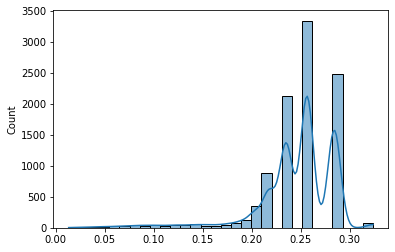

In [117]:
aux_df = mash_min_GS003_GS005_df.merge(read_ids_df, how='left', on="read_id")
print(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values.mean())
sns.histplot(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values, kde=True, bins=30)

### GS003_GS037

In [56]:
aux_mindist_path = "../distances/mash-k10-s100/GS003_GS037.mindist"
if os.path.exists(aux_mindist_path):
    mash_min_GS003_GS037_df = pd.read_csv(aux_mindist_path)
else:
    mash_min_GS003_GS037_df = calculate_mash_mindist("../distances/mash-k10-s100/GS003_GS037.dist")
    mash_min_GS003_GS037_df.to_csv(aux_mindist_path, index=False)
    
mash_min_GS003_GS037_df

,read_id,mindist
0,JCVI_READ_1091145030183,0.256495
1,JCVI_READ_1096013066145,0.235138
2,JCVI_READ_1095403403926,0.284297
3,JCVI_READ_1095403478765,0.256495
4,JCVI_READ_1095403421433,0.256495
...,...,...
19995,JCVI_READ_1095964463383,0.235138
19996,JCVI_READ_1095964465303,0.203377
19997,JCVI_READ_1095964452922,0.217853
19998,JCVI_READ_1095964451194,0.217853


0.24992508219


<AxesSubplot:ylabel='Count'>

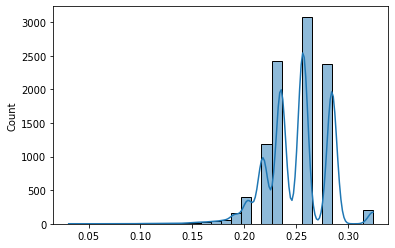

In [116]:
aux_df = mash_min_GS003_GS037_df.merge(read_ids_df, how='left', on="read_id")
print(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values.mean())
sns.histplot(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values, kde=True, bins=30)

In [105]:
sv1 = mash_min_GS003_GS005_df.merge(read_ids_df, how='left', on="read_id")
sv1 = sv1[sv1["sample_id"] == "GS003"]["mindist"].values
sv2 = mash_min_GS003_GS037_df.merge(read_ids_df, how='left', on="read_id")
sv2 = sv2[sv2["sample_id"] == "GS003"]["mindist"].values

print(stats.kstest(sv1, 'norm'))
print(stats.kstest(sv2, 'norm'))

stats.ttest_ind(sv1,sv2, equal_var=False, alternative='less')

KstestResult(statistic=0.521842141928761, pvalue=0.0)
KstestResult(statistic=0.5596621836468985, pvalue=0.0)


Ttest_indResult(statistic=-9.457991135085733, pvalue=1.7555517349995687e-21)

# OMH

In [101]:
def calculate_omh_mindist(path):
    reg = {}

    with open(path, "r") as f:

        count = 0
        for line in f:
            rec = line.split(" ")
            distance = float(rec[2])

            if reg.get(rec[0]) == None:
                reg[rec[0]] = 0
            elif reg.get(rec[0]) < distance:
                reg[rec[0]] = distance

            if reg.get(rec[1]) == None:
                reg[rec[1]] = 0
            elif reg.get(rec[1]) < distance:
                reg[rec[1]] = distance


            count += 1
            if count % int(10e6) == 0:
                print(count)
                
    return pd.DataFrame([{
        'read_id': x,
        'mindist': reg[x]
    } for x in reg])

### GS003_GS005

In [102]:
aux_mindist_path = "../distances/omh-k10-l1-m100/GS003_GS005.mindist"
if os.path.exists(aux_mindist_path):
    omh_min_GS003_GS005_df = pd.read_csv(aux_mindist_path)
else:
    omh_min_GS003_GS005_df = calculate_omh_mindist("../distances/omh-k10-l1-m100/GS003_GS005.dist")
    omh_min_GS003_GS005_df.to_csv(aux_mindist_path, index=False)
    
omh_min_GS003_GS005_df

10000000
20000000
30000000
40000000
50000000
60000000
70000000
80000000
90000000
100000000


,read_id,mindist
0,JCVI_READ_1091145030183,0.03
1,JCVI_READ_1091150264015,0.04
2,JCVI_READ_1091150264020,0.03
3,JCVI_READ_1091150264027,0.03
4,JCVI_READ_1091150264052,0.03
...,...,...
19995,JCVI_READ_1091145245693,0.03
19996,JCVI_READ_1091145137484,0.03
19997,JCVI_READ_1091145209400,0.04
19998,JCVI_READ_1091145110797,0.03


0.042891000000000006


<AxesSubplot:ylabel='Count'>

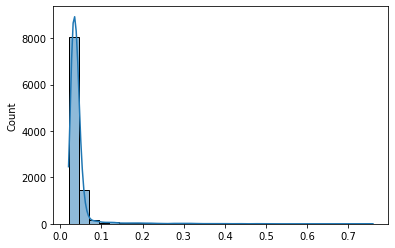

In [115]:
aux_df = omh_min_GS003_GS005_df.merge(read_ids_df, how='left', on="read_id")
print(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values.mean())
sns.histplot(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values, kde=True, bins=30)

### GS003_GS037

In [107]:
aux_mindist_path = "../distances/omh-k10-l1-m100/GS003_GS037.mindist"
if os.path.exists(aux_mindist_path):
    omh_min_GS003_GS037_df = pd.read_csv(aux_mindist_path)
else:
    omh_min_GS003_GS037_df = calculate_omh_mindist("../distances/omh-k10-l1-m100/GS003_GS037.dist")
    omh_min_GS003_GS037_df.to_csv(aux_mindist_path, index=False)
    
omh_min_GS003_GS037_df

10000000
20000000
30000000
40000000
50000000
60000000
70000000
80000000
90000000
100000000


,read_id,mindist
0,JCVI_READ_1091145030183,0.06
1,JCVI_READ_1096013066145,0.04
2,JCVI_READ_1095994149980,0.04
3,JCVI_READ_1096013056107,0.02
4,JCVI_READ_1095994149981,0.03
...,...,...
19995,JCVI_READ_1091145245693,0.04
19996,JCVI_READ_1091145137484,0.05
19997,JCVI_READ_1091145209400,0.04
19998,JCVI_READ_1091145110797,0.07


0.0396


<AxesSubplot:ylabel='Count'>

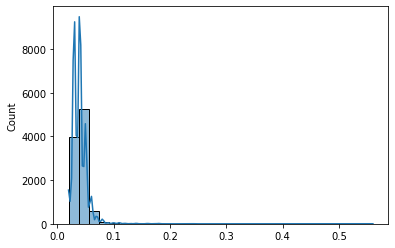

In [118]:
aux_df = omh_min_GS003_GS037_df.merge(read_ids_df, how='left', on="read_id")
print(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values.mean())
sns.histplot(aux_df[aux_df["sample_id"] == "GS003"]["mindist"].values, kde=True, bins=30)

In [110]:
sv1 = omh_min_GS003_GS005_df.merge(read_ids_df, how='left', on="read_id")
sv1 = sv1[sv1["sample_id"] == "GS003"]["mindist"].values
sv2 = omh_min_GS003_GS037_df.merge(read_ids_df, how='left', on="read_id")
sv2 = sv2[sv2["sample_id"] == "GS003"]["mindist"].values

In [ ]:
mash_GS003_GS005_df = pd.read_csv("../distances/mash-k10-s100/GS003_GS005.dist.gz", sep="\t", header=None, 
                                  compression="gzip", low_memory=True)
print(mash_GS003_GS005_df.shape)
mash_GS003_GS005_df.head()

In [9]:
GS003_GS037_df = pd.read_csv("../distances/mash-k10-s10/GS003_GS037.dist", sep="\t", header=None)
GS003_GS037_df

,0,1,2,3,4
0,JCVI_READ_1091145030183,JCVI_READ_1096013066145,1.0,1.0,0/10
1,JCVI_READ_1095403403926,JCVI_READ_1096013066145,1.0,1.0,0/10
2,JCVI_READ_1095403478765,JCVI_READ_1096013066145,1.0,1.0,0/10
3,JCVI_READ_1095403421433,JCVI_READ_1096013066145,1.0,1.0,0/10
4,JCVI_READ_1095403403927,JCVI_READ_1096013066145,1.0,1.0,0/10
...,...,...,...,...,...
999995,JCVI_READ_1091145052303,JCVI_READ_1095964451152,1.0,1.0,0/10
999996,JCVI_READ_1091143440212,JCVI_READ_1095964451152,1.0,1.0,0/10
999997,JCVI_READ_1091143440214,JCVI_READ_1095964451152,1.0,1.0,0/10
999998,JCVI_READ_1091145269177,JCVI_READ_1095964451152,1.0,1.0,0/10


In [23]:
GS005_GS037_df = pd.read_csv("../distances/mash-k10-s10/GS005_GS037.dist", sep="\t", header=None)
GS005_GS037_df

,0,1,2,3,4
0,JCVI_READ_1091150264015,JCVI_READ_1096013066145,1.0,1.0,0/10
1,JCVI_READ_1091150264020,JCVI_READ_1096013066145,1.0,1.0,0/10
2,JCVI_READ_1091150264027,JCVI_READ_1096013066145,1.0,1.0,0/10
3,JCVI_READ_1091150264052,JCVI_READ_1096013066145,1.0,1.0,0/10
4,JCVI_READ_1091150264056,JCVI_READ_1096013066145,1.0,1.0,0/10
...,...,...,...,...,...
999995,JCVI_READ_1091143675531,JCVI_READ_1095964451152,1.0,1.0,0/10
999996,JCVI_READ_1091143675553,JCVI_READ_1095964451152,1.0,1.0,0/10
999997,JCVI_READ_1091143675564,JCVI_READ_1095964451152,1.0,1.0,0/10
999998,JCVI_READ_1091145300723,JCVI_READ_1095964451152,1.0,1.0,0/10


0.1542038675


<AxesSubplot:ylabel='Count'>

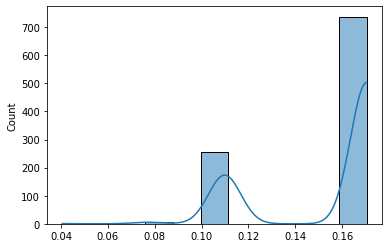

In [28]:
print(GS003_GS005_df.groupby(0)[2].min().values.mean())
sns.histplot(data=GS003_GS005_df.groupby(0)[2].min().values, kde=True)

0.1574164095


<AxesSubplot:ylabel='Count'>

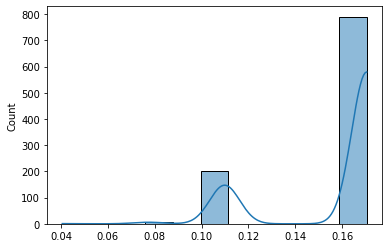

In [31]:
print(GS003_GS005_df.groupby(1)[2].min().values.mean())
sns.histplot(data=GS003_GS005_df.groupby(1)[2].min().values, kde=True)

0.160084327


<AxesSubplot:ylabel='Count'>

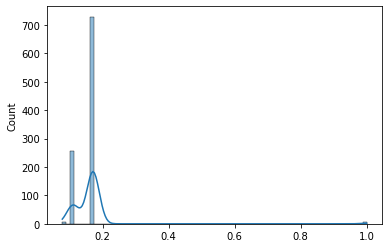

In [29]:
print(GS003_GS037_df.groupby(0)[2].min().values.mean())
sns.histplot(data=GS003_GS037_df.groupby(0)[2].min().values, kde=True)

0.150426428


<AxesSubplot:ylabel='Count'>

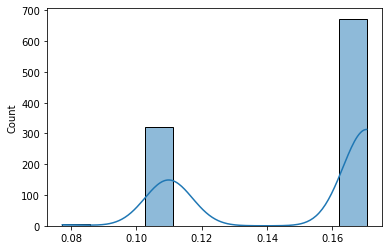

In [32]:
print(GS003_GS037_df.groupby(1)[2].min().values.mean())
sns.histplot(data=GS003_GS037_df.groupby(1)[2].min().values, kde=True)

0.1654171872


<AxesSubplot:ylabel='Count'>

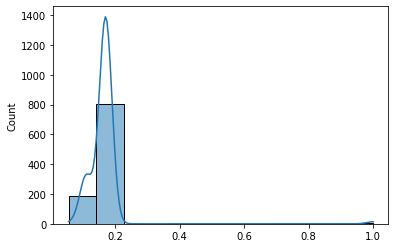

In [30]:
print(GS005_GS037_df.groupby(0)[2].min().values.mean())
sns.histplot(data=GS005_GS037_df.groupby(0)[2].min().values, kde=True)

# OMH

In [38]:
omh_GS003_GS005_df = pd.read_csv("../distances/omh-k10-l1-m10//GS003_GS005.dist", sep=" ", header=None)
omh_GS003_GS005_df

,0,1,2
0,JCVI_READ_1091145030183,JCVI_READ_1091150264015,0.0
1,JCVI_READ_1091145030183,JCVI_READ_1091150264020,0.0
2,JCVI_READ_1091145030183,JCVI_READ_1091150264027,0.0
3,JCVI_READ_1091145030183,JCVI_READ_1091150264052,0.0
4,JCVI_READ_1091145030183,JCVI_READ_1091150264056,0.0
...,...,...,...
999995,JCVI_READ_1091143448664,JCVI_READ_1091143675531,0.0
999996,JCVI_READ_1091143448664,JCVI_READ_1091143675553,0.0
999997,JCVI_READ_1091143448664,JCVI_READ_1091143675564,0.0
999998,JCVI_READ_1091143448664,JCVI_READ_1091145300723,0.0


In [39]:
omh_GS003_GS037_df = pd.read_csv("../distances/omh-k10-l1-m10//GS003_GS037.dist", sep=" ", header=None)
omh_GS003_GS037_df

,0,1,2
0,JCVI_READ_1091145030183,JCVI_READ_1096013066145,0.0
1,JCVI_READ_1091145030183,JCVI_READ_1095994149980,0.0
2,JCVI_READ_1091145030183,JCVI_READ_1096013056107,0.0
3,JCVI_READ_1091145030183,JCVI_READ_1095994149981,0.0
4,JCVI_READ_1091145030183,JCVI_READ_1095994158268,0.0
...,...,...,...
999995,JCVI_READ_1091143448664,JCVI_READ_1095964696530,0.0
999996,JCVI_READ_1091143448664,JCVI_READ_1095978337520,0.0
999997,JCVI_READ_1091143448664,JCVI_READ_1095964451135,0.0
999998,JCVI_READ_1091143448664,JCVI_READ_1095964452863,0.0


0.11080000000000002


<AxesSubplot:ylabel='Count'>

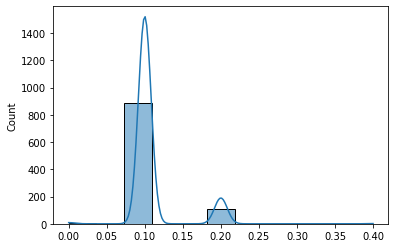

In [44]:
print(omh_GS003_GS005_df.groupby(0)[2].max().values.mean())
sns.histplot(data=omh_GS003_GS005_df.groupby(0)[2].max().values, kde=True)

0.11120000000000002


<AxesSubplot:ylabel='Count'>

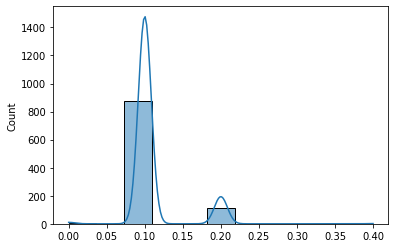

In [46]:
print(omh_GS003_GS005_df.groupby(1)[2].max().values.mean())
sns.histplot(data=omh_GS003_GS005_df.groupby(1)[2].max().values, kde=True)

0.11160000000000002


<AxesSubplot:ylabel='Count'>

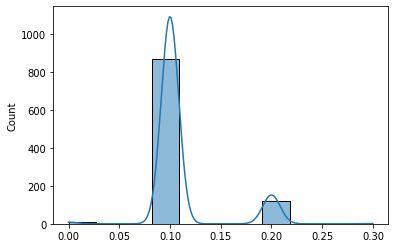

In [45]:
print(omh_GS003_GS037_df.groupby(0)[2].max().values.mean())
sns.histplot(data=omh_GS003_GS037_df.groupby(0)[2].max().values, kde=True)